<a href="https://colab.research.google.com/github/NanjuJung/NanjuJung.github.io/blob/main/SOM_geoAI_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2024 경희대학교 지리학과 특강 (2) Self Organizing Map

### 1. 시작하기전에

##### 1) google drive 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### 2) data 연결 및 불러오기 (상대경로)

In [ ]:
import os
import pandas as pd

# 현재 작업 디렉토리 확인
print("Current working directory:", os.getcwd())

# 상대경로로 파일 불러오기
file_path = 'drive/My Drive/2024_lec/data/gapminder_1800_2018.csv'

# CSV 파일 읽기
gap_df = pd.read_csv(file_path)

Current working directory: /content


In [ ]:
gap_df.head()

,country,year,child_mortality,fertility,per_cap_co2,income,life_expectancy,population
0,Afghanistan,1800,469.0,7.0,NaN,603.0,28.2,3280000
1,Afghanistan,1801,469.0,7.0,NaN,603.0,28.2,3280000
2,Afghanistan,1802,469.0,7.0,NaN,603.0,28.2,3280000
3,Afghanistan,1803,469.0,7.0,NaN,603.0,28.2,3280000
4,Afghanistan,1804,469.0,7.0,NaN,603.0,28.2,3280000


##### 3) 데이터 확인하기

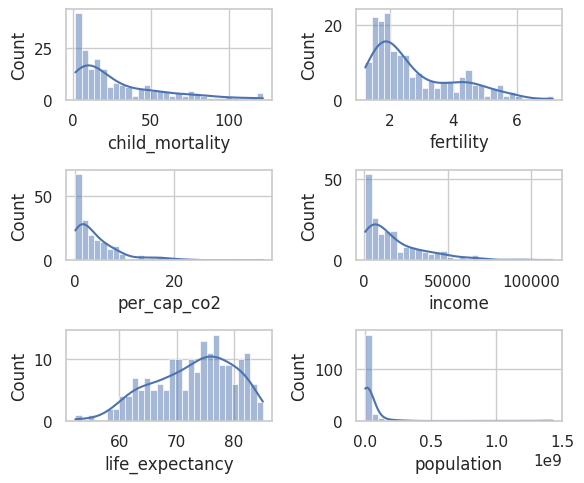

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터에서 특정 연도(예: 2018년)만 필터링
gap_df_2018 = gap_df[gap_df['year'] == 2018]

# 스타일 설정
sns.set(style="whitegrid")

# 변수별 히스토그램 그림
fig, axes = plt.subplots(3, 2, figsize=(6, 5))

# child_mortality 히스토그램
sns.histplot(gap_df_2018['child_mortality'], bins=30, kde=True, ax=axes[0, 0])

# fertility 히스토그램
sns.histplot(gap_df_2018['fertility'], bins=30, kde=True, ax=axes[0, 1])

# per_cap_co2 히스토그램
sns.histplot(gap_df_2018['per_cap_co2'], bins=30, kde=True, ax=axes[1, 0])

# income 히스토그램
sns.histplot(gap_df_2018['income'], bins=30, kde=True, ax=axes[1, 1])

# life_expectancy 히스토그램
sns.histplot(gap_df_2018['life_expectancy'], bins=30, kde=True, ax=axes[2, 0])

# population 히스토그램
sns.histplot(gap_df_2018['population'], bins=30, kde=True, ax=axes[2, 1])

# 레이아웃 조정
plt.tight_layout()

# 그래프 보여줌
plt.show()

##### 4) log transform하기 - 정규분포화 -> 분류의 성능을 올릴 수 있음 (왜? - 이상치 감소, 스케일 조정, 비선형의 선형화...)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# 결측치 제거하고 per_cap_co2 > 0 필터링
gap_df_filtered = gap_df.dropna().loc[gap_df['per_cap_co2'] > 0]

# 로그 변환 후 표준화 함수 (평균을 0, 표준편차를 1로)
def log_scale(series):
    return StandardScaler().fit_transform(np.log(series).values.reshape(-1, 1))

# 각 열에 대해 로그 변환 후 표준화 적용
gap_df_filtered['child_mortality'] = log_scale(gap_df_filtered['child_mortality'])
gap_df_filtered['fertility'] = log_scale(gap_df_filtered['fertility'])
gap_df_filtered['per_cap_co2'] = log_scale(gap_df_filtered['per_cap_co2'])
gap_df_filtered['income'] = log_scale(gap_df_filtered['income'])
gap_df_filtered['life_expectancy'] = log_scale(gap_df_filtered['life_expectancy'])
gap_df_filtered['population'] = log_scale(gap_df_filtered['population'])

# 결과 확인을 위해 데이터프레임 일부 출력
gap_df_filtered.head()

,country,year,child_mortality,fertility,per_cap_co2,income,life_expectancy,population
149,Afghanistan,1949,1.223541,1.259311,-2.896230,-0.564280,-1.637774,0.191907
150,Afghanistan,1950,1.219790,1.261941,-2.064095,-0.553149,-1.627877,0.201348
151,Afghanistan,1951,1.214129,1.259311,-2.030154,-0.542157,-1.588593,0.207793
152,Afghanistan,1952,1.202684,1.256678,-2.038416,-0.527711,-1.520981,0.214867
153,Afghanistan,1953,1.191069,1.254041,-1.972346,-0.489164,-1.454764,0.221852


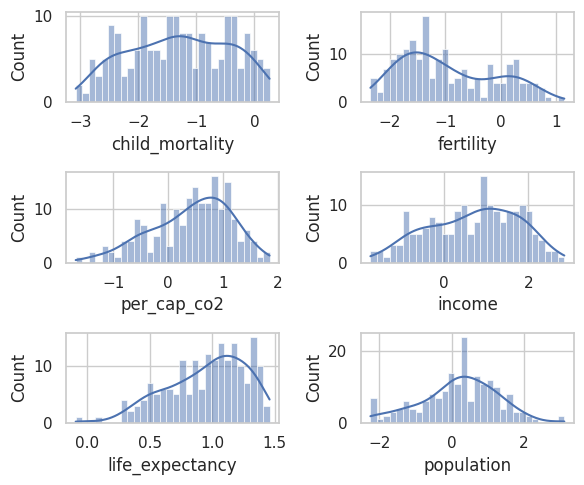

In [ ]:
# 다시 그려보기

# 데이터에서 특정 연도(예: 2018년)만 필터링
gap_df_filtered_2018 = gap_df_filtered[gap_df_filtered['year'] == 2018]

# 스타일 설정
sns.set(style="whitegrid")

# 변수별 히스토그램 그림
fig, axes = plt.subplots(3, 2, figsize=(6, 5))

# child_mortality 히스토그램
sns.histplot(gap_df_filtered_2018['child_mortality'], bins=30, kde=True, ax=axes[0, 0])

# fertility 히스토그램
sns.histplot(gap_df_filtered_2018['fertility'], bins=30, kde=True, ax=axes[0, 1])

# per_cap_co2 히스토그램
sns.histplot(gap_df_filtered_2018['per_cap_co2'], bins=30, kde=True, ax=axes[1, 0])

# income 히스토그램
sns.histplot(gap_df_filtered_2018['income'], bins=30, kde=True, ax=axes[1, 1])

# life_expectancy 히스토그램
sns.histplot(gap_df_filtered_2018['life_expectancy'], bins=30, kde=True, ax=axes[2, 0])

# population 히스토그램
sns.histplot(gap_df_filtered_2018['population'], bins=30, kde=True, ax=axes[2, 1])

# 레이아웃 조정
plt.tight_layout()

# 그래프 보여줌
plt.show()

### 2. Building a SOM model

##### 2.1) SOM 모델 만들기

*   SOM모델의 차원정하기 (축소할 차원 > feature의 수)
*   모델에 데이터를 input하여 결과 얻기
*   가시화하기


In [ ]:
!pip install MiniSom

In [ ]:
# 데이터 추출
cols = ["child_mortality", "fertility", "per_cap_co2",
        "income", "life_expectancy", "population"]


X = gap_df_filtered[cols].values
X.shape

(17676, 6)

In [ ]:
from minisom import MiniSom

# 빈 SOM모델 만들기. (20 * 10 dimension)
som = MiniSom(20, 10, X.shape[1], sigma=10., learning_rate=.75,
              neighborhood_function='gaussian', topology = 'hexagonal',
              random_seed=0)

/usr/local/lib/python3.10/dist-packages/minisom.py:164: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


In [ ]:
# Model training하기.

som.random_weights_init(X)
som.train(X, 10000, verbose=True)  # random training

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 1.4621547547788694


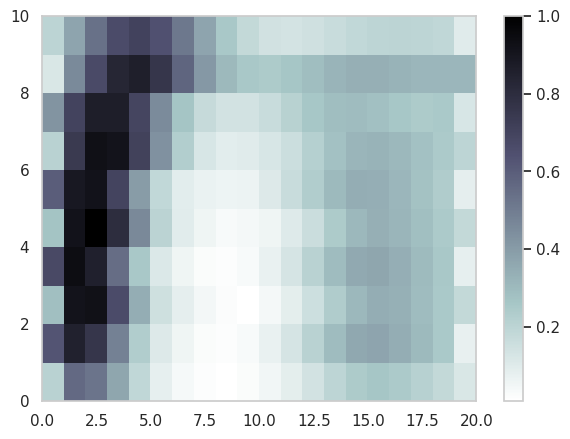

In [ ]:
plt.figure(figsize=(7, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

##### 2.2) 가시화 하기

*   feature 별로 군집화양상이 어떤 식인지 알아보기



In [ ]:
som_weights = som.get_weights()
som_weights.shape

(20, 10, 6)

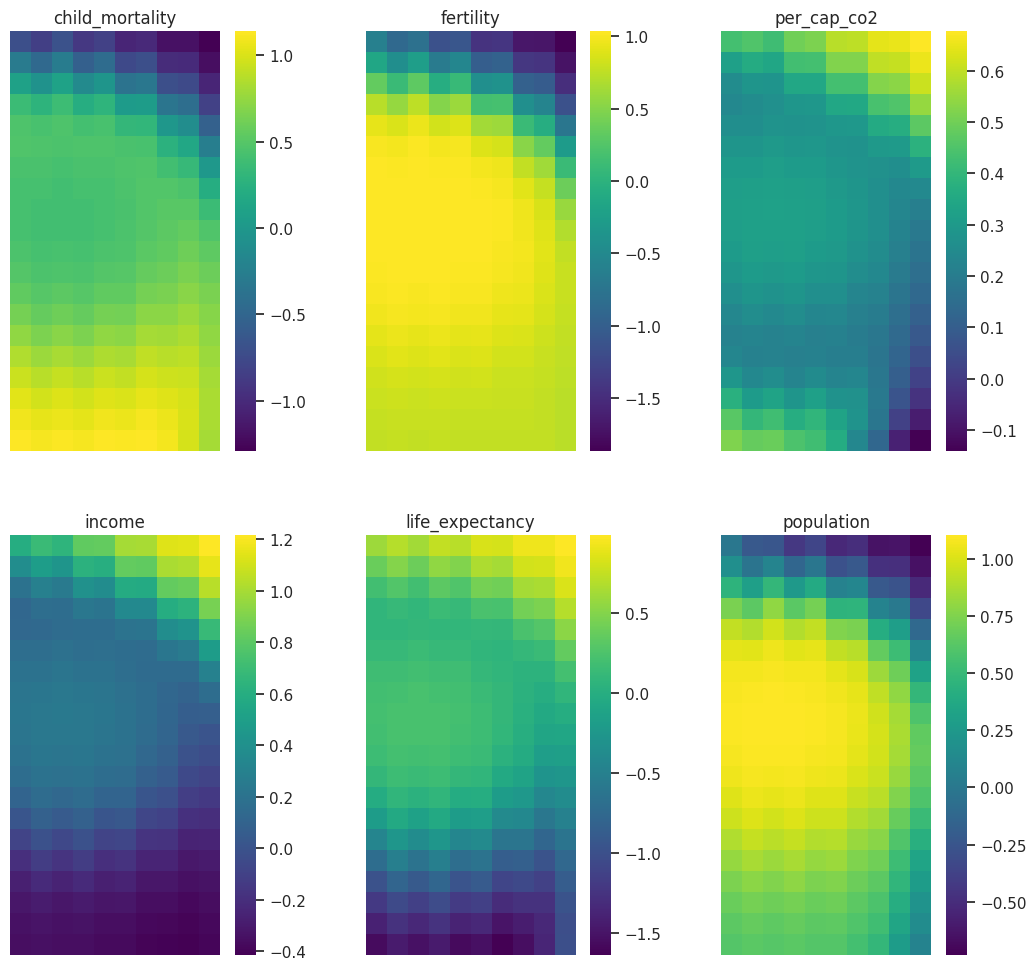

In [ ]:
fig = plt.figure(figsize=(13,12))

ax1 = fig.add_subplot(231, aspect='equal')
plot_var = 0
sns.heatmap(som_weights[:,:,plot_var], cmap="viridis", xticklabels=False, yticklabels=False)
ax1.set_title(cols[plot_var])

ax2 = fig.add_subplot(232, aspect='equal')
plot_var = 1
sns.heatmap(som_weights[:,:,plot_var], cmap="viridis", xticklabels=False, yticklabels=False)
ax2.set_title(cols[plot_var])

ax3 = fig.add_subplot(233, aspect='equal')
plot_var = 2
sns.heatmap(som_weights[:,:,plot_var], cmap="viridis", xticklabels=False, yticklabels=False)
ax3.set_title(cols[plot_var])

ax4 = fig.add_subplot(234, aspect='equal')
plot_var = 3
sns.heatmap(som_weights[:,:,plot_var], cmap="viridis", xticklabels=False, yticklabels=False)
ax4.set_title(cols[plot_var])

ax5 = fig.add_subplot(235, aspect='equal')
plot_var = 4
sns.heatmap(som_weights[:,:,plot_var], cmap="viridis", xticklabels=False, yticklabels=False)
ax5.set_title(cols[plot_var])

ax6 = fig.add_subplot(236, aspect='equal')
plot_var = 5
sns.heatmap(som_weights[:,:,plot_var], cmap="viridis", xticklabels=False, yticklabels=False)
ax6.set_title(cols[plot_var])

plt.show()

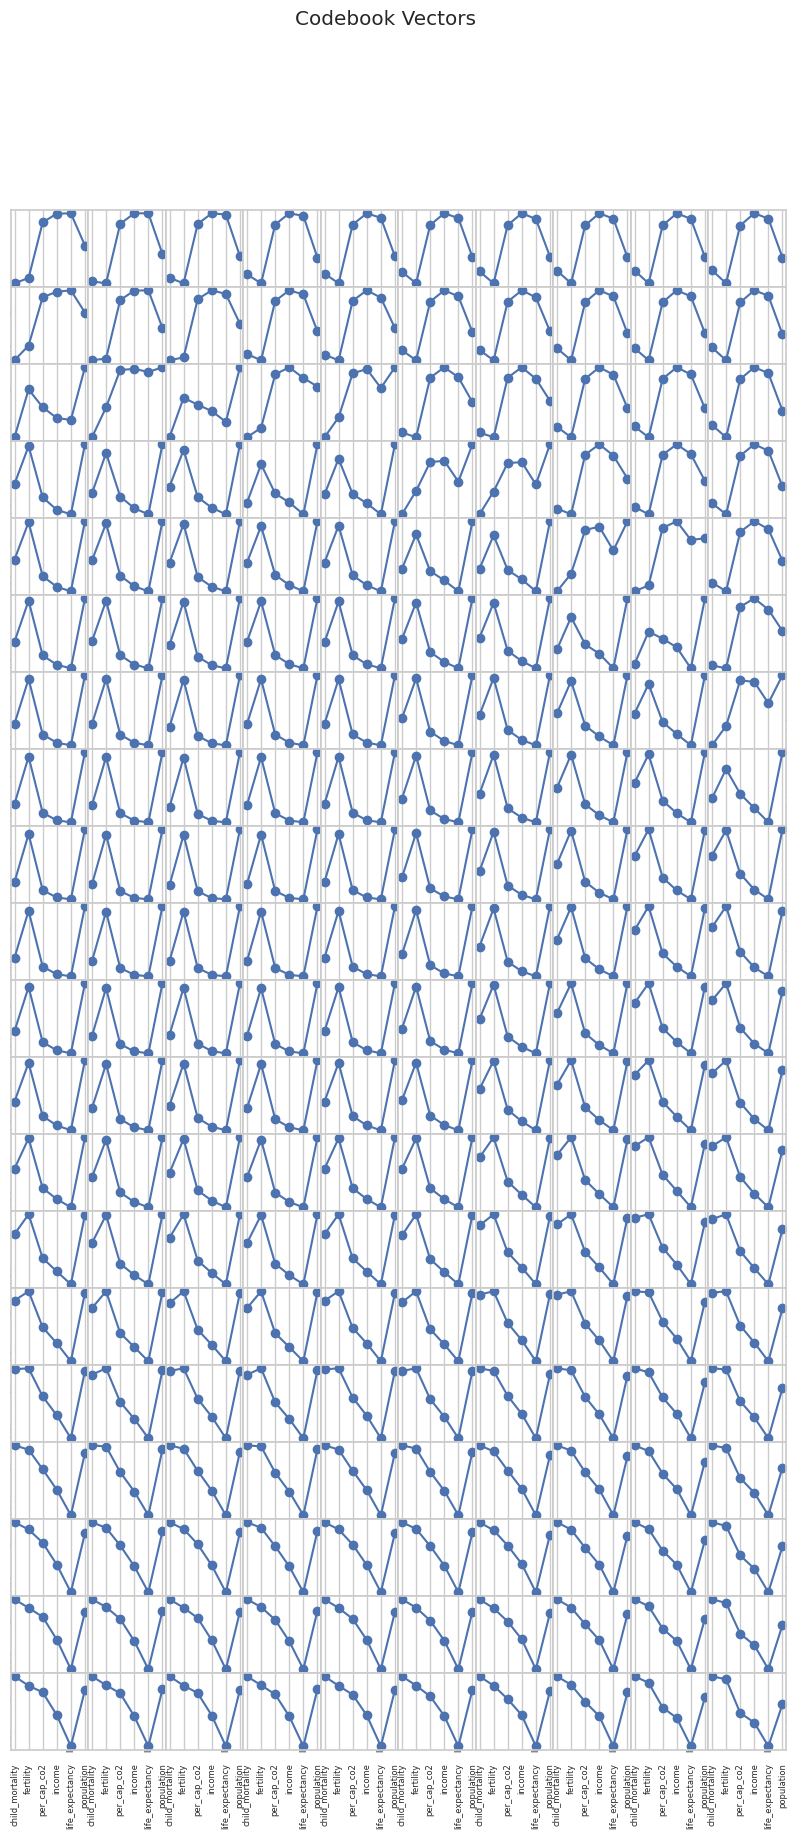

In [ ]:
# 그래프 가시화 2
# Codebook vectors 시각화 함수

def plot_codebook_matrix(som, colnames):
    weights = som.get_weights()
    msz_x, msz_y, dims = weights.shape
    fig, axarr = plt.subplots(msz_x, msz_y, figsize=(msz_y, msz_x), gridspec_kw={'wspace': 0, 'hspace': 0})

    for i in range(msz_x):
        for j in range(msz_y):
            ax = axarr[i, j]
            ax.plot(weights[i, j, :], marker='o')
            ax.set_xticks(range(dims))
            ax.set_xticklabels(colnames, rotation=90, fontsize=6)
            ax.set_yticks([])
            ax.tick_params(axis='x', which='both', bottom=False, top=False)

    plt.suptitle('Codebook Vectors')
    plt.show()

# 시각화 함수 호출
plot_codebook_matrix(som, cols)

In [ ]:
cols

['child_mortality',
 'fertility',
 'per_cap_co2',
 'income',
 'life_expectancy',
 'population']

### 2.3) SOM 가중치벡터들 (객체들)을 군집화 하고 한 나라의 군집변화를 살펴보기

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


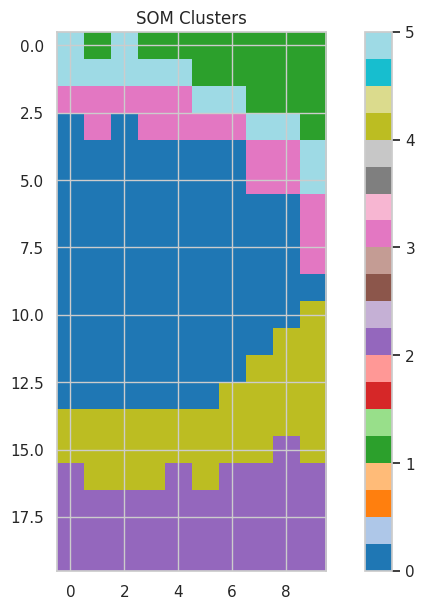

In [ ]:
from sklearn.cluster import KMeans
# SOM의 가중치 벡터 추출
weights = som.get_weights().reshape(-1, X.shape[1])

# KMeans 알고리즘을 사용하여 6개의 군집으로 군집화
kmeans = KMeans(n_clusters=6, random_state=0).fit(weights)
labels = kmeans.labels_.reshape(som._weights.shape[:2])

# 군집 결과 시각화 함수
def plot_clusters(labels):
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.imshow(labels, cmap='tab20')
    ax.set_title('SOM Clusters')
    plt.colorbar(ax.imshow(labels, cmap='tab20'), ax=ax)
    plt.show()

# 시각화 함수 호출
plot_clusters(labels)

In [ ]:
# 이제 미국의 속성값 군집 양상을 시간별로 살펴보기

X_country = X[gap_df_filtered['country'] == "United States", :]
X_country.shape

# 219개 년도 1800~2018년, 6개의 features ['child_mortality', 'fertility', 'per_cap_co2', 'income', 'life_expectancy', 'population']

(219, 6)

In [ ]:
# 미국의 6개 feature 변화 -> SOM 가중치벡터에 투영하면 다음과 같은 coordinate이 됌.

def get_node_crds( x ):
    return som.winner(x) # x의 가중치 벡터 위 그리드 coordinate 추출
country_crds = np.apply_along_axis( get_node_crds, axis=1, arr=X_country )
country_crds

array([[19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [19,  9],
       [18,  9],
       [19,  8],
       [16,  8],
       [16,  8],
       [16,  8],
       [16,  8],
       [16,  8],
       [16,  8],
       [16,  8],
       [16,  8],
       [16,  8],
       [15,  8],
       [16,  7],
       [16,  7],
       [16,  7],
       [16,  7],
       [16,  7],
       [16,  7],
       [16,  6],
       [16,  4],
       [16,  4],
       [16,  4],
       [17,  3],
       [17,  3],
       [17,  3],
       [17,  3

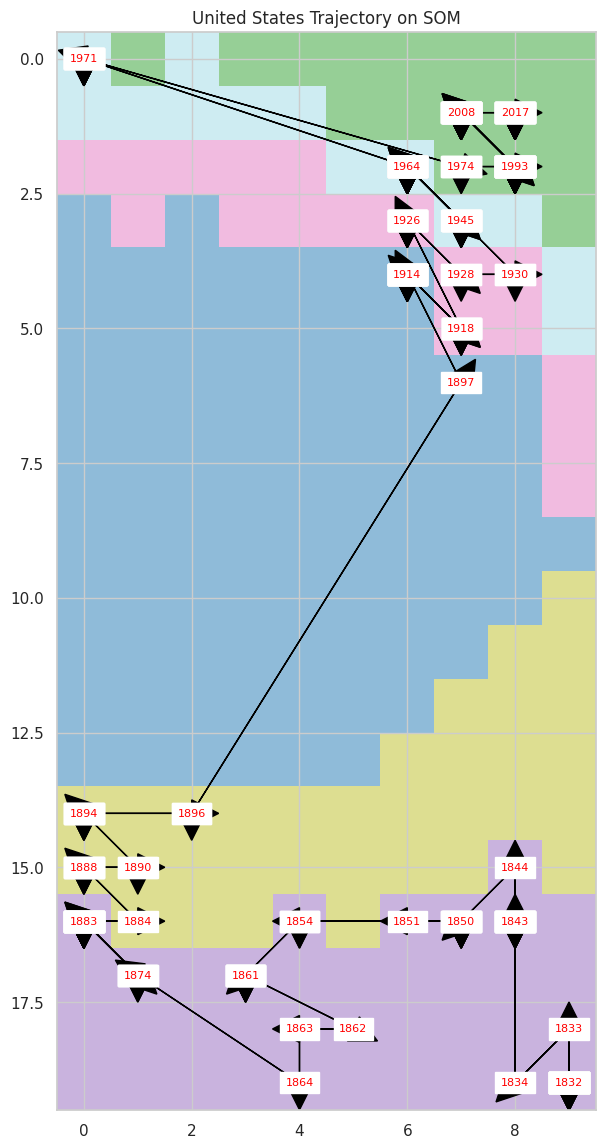

In [ ]:
# years 추출
years = gap_df_filtered[gap_df_filtered['country'] == "United States"]['year'].values

# 좌표를 궤적으로 시각화
def plot_country_trajectory(crds, years):
    fig, ax = plt.subplots(figsize=(20, 14))
    ax.imshow(labels, cmap='tab20', alpha=0.5)
    for i in range(len(crds) - 1):
        y, x = crds[i]
        ny, nx = crds[i + 1]
        ax.arrow(x, y, nx - x, ny - y, head_width=0.5, head_length=0.5, fc='black', ec='black')
        ax.text(x, y, str(years[i]), fontsize=8, ha='center', va='center', color='red', backgroundcolor='white')
    ax.set_title('United States Trajectory on SOM')
    plt.show()

# 시각화 함수 호출
plot_country_trajectory(country_crds, years)

##### 2.4) Map 시각화

In [ ]:
# som_clust 컬럼에 SOM 클러스터 결과 넣기

def assign_cluster(x):
    winner = som.winner(x)
    weight_index = winner[0] * som.get_weights().shape[1] + winner[1]
    return kmeans.labels_[weight_index]

# Apply the clustering function to the filtered data
gap_df_filtered['som_clust'] = gap_df_filtered[cols].apply(lambda row: assign_cluster(row.values), axis=1)


In [ ]:
gap_df_filtered[20:30]

,country,year,child_mortality,fertility,per_cap_co2,income,life_expectancy,population,som_clust
169,Afghanistan,1969,0.984707,1.230153,-1.071448,-0.482333,-0.519206,0.391713,2
170,Afghanistan,1970,0.971906,1.230153,-0.807642,-0.489164,-0.470600,0.406867,2
171,Afghanistan,1971,0.956264,1.230153,-0.761967,-0.513498,-0.456846,0.421621,4
172,Afghanistan,1972,0.942986,1.230153,-0.876219,-0.697010,-0.456846,0.435994,2
173,Afghanistan,1973,0.926748,1.230153,-0.858133,-0.697010,-0.449991,0.450007,2
174,Afghanistan,1974,0.910166,1.230153,-0.795030,-0.675569,-0.443151,0.463676,4
175,Afghanistan,1975,0.896074,1.230153,-0.753332,-0.646401,-0.436326,0.477019,4
176,Afghanistan,1976,0.878822,1.230153,-0.798152,-0.622147,-0.422718,0.485740,4
177,Afghanistan,1977,0.861180,1.230153,-0.717615,-0.692680,-0.409167,0.498571,4
178,Afghanistan,1978,0.843131,1.230153,-0.770761,-0.654637,-0.519206,0.502784,4


In [ ]:
#2000년도
gap_df_2000 = gap_df_filtered[gap_df_filtered.year == 2000]
gap_df_2000.head()

,country,year,child_mortality,fertility,per_cap_co2,income,life_expectancy,population,som_clust
200,Afghanistan,2000,0.304069,1.240806,-1.478414,-1.651736,0.038200,0.752378,4
501,Albania,2000,-0.951622,-1.232834,0.084919,0.171613,1.053402,-0.304695,1
802,Algeria,2000,-0.617587,-0.934089,0.598320,0.734131,1.014579,0.975095,5
1404,Angola,2000,0.670134,1.001179,-0.158723,-0.123910,-0.137068,0.619724,4
1705,Antigua and Barbuda,2000,-1.338154,-1.090680,0.826520,1.353436,1.044815,-2.379890,1


In [ ]:
!pip install country_converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
import country_converter as coco

gap_iso3 = coco.convert(names=gap_df_2000.country, to='ISO3', not_found=None) #ISO3라는 country의 약자를 붙임.
gap_df_2000 = gap_df_2000.assign(ISO_A3 = gap_iso3)

In [ ]:
gap_df_2000.head()

,country,year,child_mortality,fertility,per_cap_co2,income,life_expectancy,population,som_clust,ISO_A3
200,Afghanistan,2000,0.304069,1.240806,-1.478414,-1.651736,0.038200,0.752378,4,AFG
501,Albania,2000,-0.951622,-1.232834,0.084919,0.171613,1.053402,-0.304695,1,ALB
802,Algeria,2000,-0.617587,-0.934089,0.598320,0.734131,1.014579,0.975095,5,DZA
1404,Angola,2000,0.670134,1.001179,-0.158723,-0.123910,-0.137068,0.619724,4,AGO
1705,Antigua and Barbuda,2000,-1.338154,-1.090680,0.826520,1.353436,1.044815,-2.379890,1,ATG


In [ ]:
# border data import
import geopandas as gpd
borders = gpd.read_file("drive/My Drive/2024_lec/data/ne_50m_admin_0_countries.shp")

borders2 = borders.merge(gap_df_2000, on='ISO_A3')
borders2.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3',
       ...
       'geometry', 'country', 'year', 'child_mortality', 'fertility',
       'per_cap_co2', 'income', 'life_expectancy', 'population', 'som_clust'],
      dtype='object', length=104)

<Axes: >

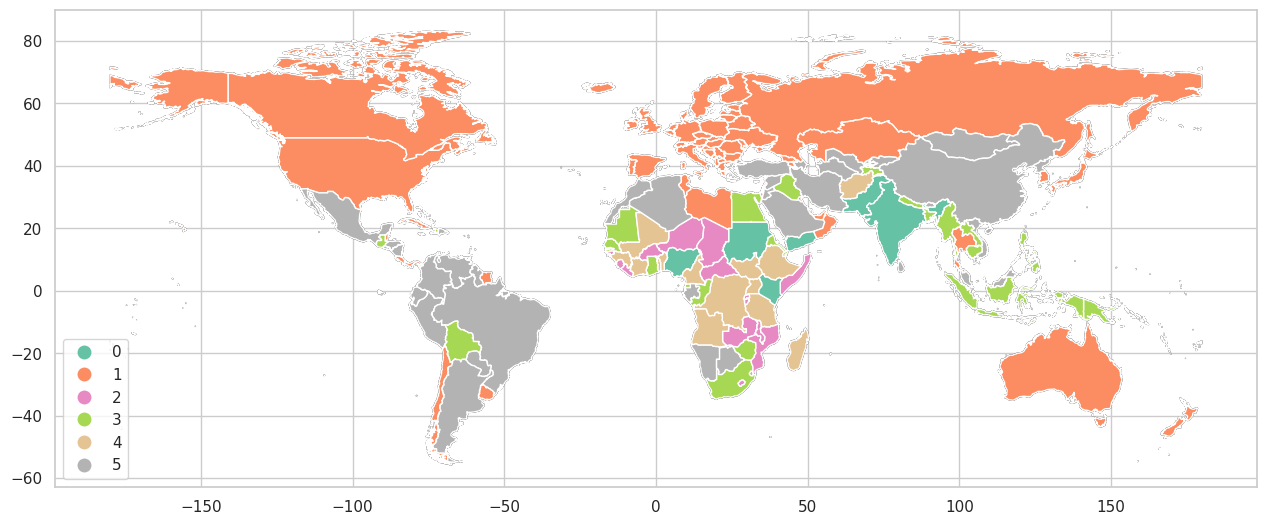

In [ ]:
base = borders2.plot(figsize = (15.5, 9.5), edgecolor="black", facecolor="None")
borders2.plot(ax = base, column = 'som_clust', categorical=True,
             cmap = 'Set2', legend = True, legend_kwds={'loc': 'lower left'})